# Feature selection using Logistic regression

Logistic regression is not just another statistical technique; it's a fundamental building block of machine learning and a go-to method for tackling binary classification problems. Its ability to predict outcomes in the form of probabilities makes it indispensable in a wide range of fields, from healthcare and finance to social sciences and beyond. With its simplicity, interpretability, and robustness, logistic regression has earned its place as a must-know tool for data scientists, analysts, and decision-makers.

Feature selection is akin to mining for precious gems in a vast quarry. In this article, we embark on a quest to unearth those gems and explore three fundamental techniques that can enhance the predictive power of logistic regression—a workhorse of classification and binary decision-making tasks.

## Representation

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from patsy import dmatrices
#from mlxtend.feature_selection import SequentialFeatureSelector

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        #self.coefficients = None
        
   

    def fit(self, X, y, single_feature= False):
        n_samples, n_features = X.shape 

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
        #self.coefficients = regression_solver(X, y)

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
"""    
def regression_solver(X, y):
    # Add a column of ones to X for the bias term
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Use the normal equations to calculate the coefficients
    XtX = np.dot(X.T, X)
    XtX_inv = np.linalg.inv(XtX)
    Xty = np.dot(X.T, y)
    coefficients = np.dot(XtX_inv, Xty)

    # The first element is the bias term, and the rest are feature coefficients
    return coefficients   
"""

'    \ndef regression_solver(X, y):\n    # Add a column of ones to X for the bias term\n    X = np.hstack((np.ones((X.shape[0], 1)), X))\n\n    # Use the normal equations to calculate the coefficients\n    XtX = np.dot(X.T, X)\n    XtX_inv = np.linalg.inv(XtX)\n    Xty = np.dot(X.T, y)\n    coefficients = np.dot(XtX_inv, Xty)\n\n    # The first element is the bias term, and the rest are feature coefficients\n    return coefficients   \n'

In [3]:
def accuracy_score(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [4]:
all_df = pd.read_csv('../datasets/mushrooms.csv', index_col=False)
all_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
all_df.shape

(8124, 23)

In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<AxesSubplot:xlabel='class', ylabel='Count'>

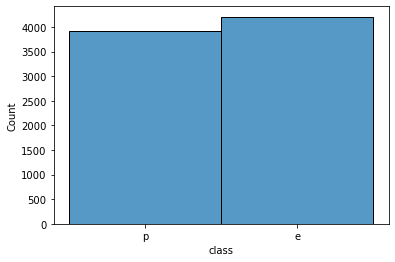

In [7]:
sns.histplot(all_df['class'])

In [8]:
y = all_df['class']
X = all_df.drop(labels =['class'],axis=1)

In [9]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [10]:
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=3, stratify=y_train)

In [47]:
y_train

array([0, 1, 0, ..., 1, 0, 1])

# Model

In [48]:
LR = LogisticRegression(0.1)
LR.fit(X_train_df, y_train_df)

In [49]:
predict = LR.predict(X_val_df)
predict

array([0, 0, 1, ..., 0, 0, 0])

In [50]:
accuracy_score(y_val_df, predict)

0.984182776801406

In [42]:
def cross_validation(X, y, model, k=5):
    """
    Perform k-fold cross-validation for a given model.

    Parameters:
        X (numpy.ndarray): Feature matrix.
        y (numpy.ndarray): Target vector.
        model: Your custom logistic regression model.
        k (int): Number of folds for cross-validation.

    Returns:
        List of accuracy scores for each fold.
    """
    n = len(X)
    fold_size = n // k
    accuracy_scores = []

    for i in range(k):
        # Split data into training and validation sets
        start, end = i * fold_size, (i + 1) * fold_size
        X_train = np.concatenate((X[:start], X[end:]), axis=0)
        y_train = np.concatenate((y[:start], y[end:]), axis=0)
        X_val, y_val = np.array(X[start:end]), np.array(y[start:end])
        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on the validation data
        y_pred = model.predict(X_val)

        # Calculate accuracy and store it
        accuracy = accuracy_score(y_val, y_pred)
        accuracy_scores.append(accuracy)

    return accuracy_scores

In [43]:
# Using cross-validation to get accuracy
accuracy = cross_validation(X_train_df, y_train_df, LR, k=5)
np.average(accuracy)
#accuracies.append(np.average(accuracy))

0.9874587458745875

# Optimisation

## Hyperparameter tuning

In [36]:
learning_rates=[0.1,0.01,0.001,0.0001]
def hypTune(X_train, y_train, X_val, y_val):
    scores = []
    for lr in learning_rates:
        logReg = LogisticRegression(lr)
        logReg.fit(X_train, y_train)
        predict = logReg.predict(X_val)
        acc = accuracy_score(y_val, predict)
        scores.append(acc)
    return scores

In [51]:
scores = hypTune(X_train, y_train, X_val, y_val)
scores

[0.984182776801406, 0.9420035149384886, 0.883128295254833, 0.8892794376098418]

# Evaluation

In [52]:
predict = LR.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, predict)
accuracy

0.9819524200164069

In [54]:
# We use confusion matrix (TP, TN, FP, FN) to visualise the performance

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test_df, predict)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1263
           1       0.99      0.97      0.98      1175

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



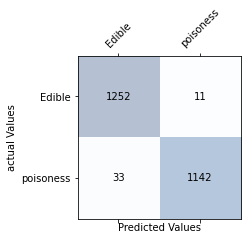

In [55]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
classes=["Edible", "poisoness"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values',)
plt.ylabel('actual Values',);
print(classification_report(y_test_df, predict))

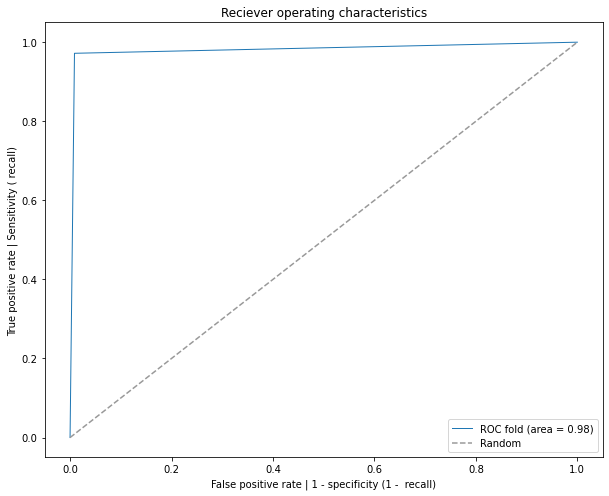

In [56]:
# Plot the rciever opertaing characteristic curve (ROC)
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10,8))
#probas_ = model.predict(X_valid['speed'])
fpr, tpr, thresholds = roc_curve(y_test_df, predict)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr, lw=1, label='ROC fold (area = %0.2f)' %(roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate | 1 - specificity (1 -  recall)')
plt.ylabel('True positive rate | Sensitivity ( recall)')
plt.title('Reciever operating characteristics')
plt.legend(loc="lower right")
#plt.axes().set_aspect(1);